In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error 


In [4]:
df = pd.read_csv("carbon_emission_dataset.csv")
df.head()

,Company_ID,Date,Sector,Total_Energy_Consumption_kWh,Renewable_Energy_Consumption_kWh,NonRenewable_Energy_Consumption_kWh,Production_Output_Units,Supply_Chain_Transport_km,Supply_Chain_Transport_Mode,Raw_Material_Usage_kg,...,Carbon_Tax_USD,Process_Efficiency_Percent,Employment_Count,Public_Acceptance_Index,Carbon_Reduction_Strategy,Strategy_Implementation_Cost_USD,Expected_Carbon_Reduction_Percent,Expected_Renewable_Share_Percent,Social_Impact_Score,Industry_Sectors
0,C001,2024-01-01,Manufacturing,53751.61,12766.80,40984.81,3008.90,3814.12,Truck,51334.48,...,338.76,81.07,2128,0.77,Process Reengineering,188176.25,16.79,40.89,0.40,Steel Manufacturing
1,C001,2024-01-02,Manufacturing,170872.89,76733.84,94139.05,4062.25,1199.66,Air,17154.72,...,1073.13,69.26,855,0.77,Efficiency Upgrade,489246.31,12.57,58.19,0.86,Cement Production
2,C001,2024-01-03,Manufacturing,142777.96,75794.17,66983.79,6196.17,3670.57,Truck,56288.43,...,1390.41,90.33,3613,0.48,Carbon Tax Compliance,165061.64,12.11,68.14,0.79,Automotive Industry
3,C001,2024-01-04,Manufacturing,152532.15,20698.80,131833.35,6714.80,2903.63,Ship,21438.17,...,1942.56,79.49,3156,0.85,Efficiency Upgrade,191619.23,5.64,23.30,0.55,Logistics
4,C001,2024-01-05,Manufacturing,81647.43,46657.82,34989.61,8887.31,1916.05,Rail,37694.23,...,472.20,68.63,4915,0.47,Process Reengineering,459129.15,12.99,65.44,0.95,Steel Manufacturing


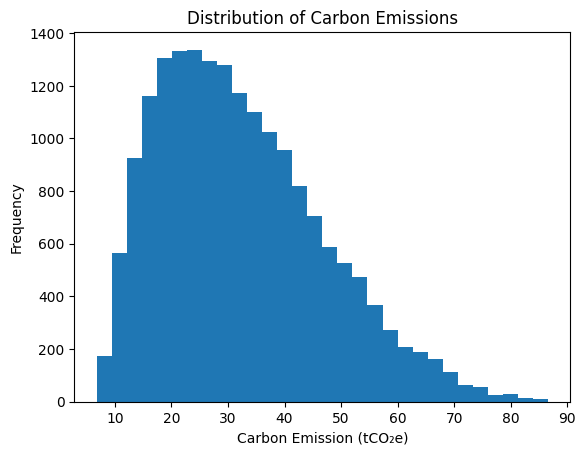

In [26]:

plt.figure()
plt.hist(df['Carbon_Emission_tCO2e_TARGET'], bins=30)
plt.xlabel("Carbon Emission (tCO₂e)")
plt.ylabel("Frequency")
plt.title("Distribution of Carbon Emissions")
plt.show()


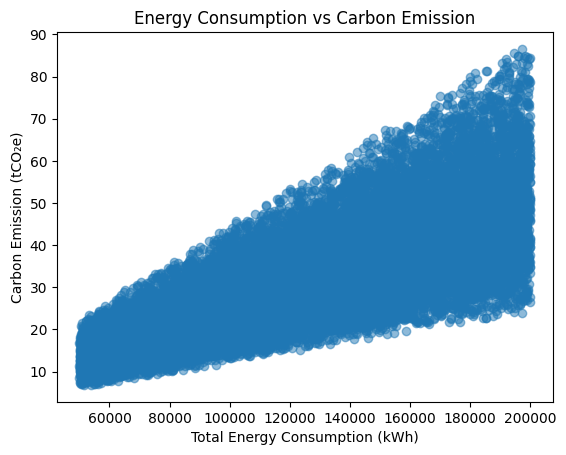

In [27]:
plt.figure()
plt.scatter(
    df['Total_Energy_Consumption_kWh'],
    df['Carbon_Emission_tCO2e_TARGET'],
    alpha=0.5
)
plt.xlabel("Total Energy Consumption (kWh)")
plt.ylabel("Carbon Emission (tCO₂e)")
plt.title("Energy Consumption vs Carbon Emission")
plt.show()

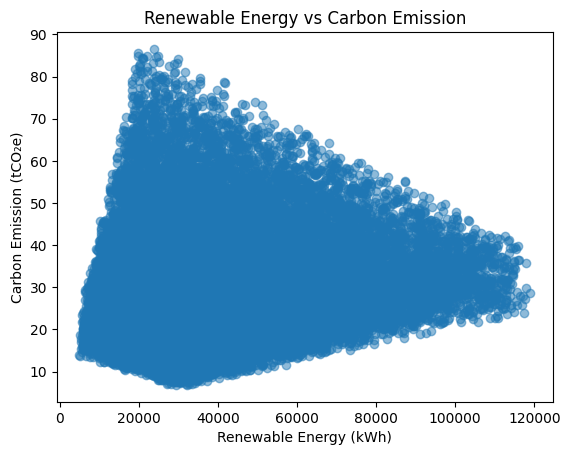

In [28]:
plt.figure()
plt.scatter(
    df['Renewable_Energy_Consumption_kWh'],
    df['Carbon_Emission_tCO2e_TARGET'],
    alpha=0.5
)
plt.xlabel("Renewable Energy (kWh)")
plt.ylabel("Carbon Emission (tCO₂e)")
plt.title("Renewable Energy vs Carbon Emission")
plt.show()


In [5]:
drop_cols = [
    'Company_ID', 'Date', 'Public_Acceptance_Index',
    'Social_Impact_Score', 'Strategy_Implementation_Cost_USD',
    'Carbon_Reduction_Strategy', 'Industry_Sectors','Employment_Count','Expected_Carbon_Reduction_Percent','Expected_Renewable_Share_Percent'
]

df = df.drop(columns=drop_cols)


In [6]:
df.isna().sum()

Sector                                    0
Total_Energy_Consumption_kWh              0
Renewable_Energy_Consumption_kWh          0
NonRenewable_Energy_Consumption_kWh       0
Production_Output_Units                   0
Supply_Chain_Transport_km               714
Supply_Chain_Transport_Mode               0
Raw_Material_Usage_kg                     0
Carbon_Emission_tCO2e_TARGET              0
Energy_Cost_USD                           0
Carbon_Tax_USD                            0
Process_Efficiency_Percent             1870
dtype: int64

In [7]:
df["Supply_Chain_Transport_km"] = df["Supply_Chain_Transport_km"].fillna(df["Supply_Chain_Transport_km"].median())
df["Process_Efficiency_Percent"] = df["Process_Efficiency_Percent"].fillna(df["Process_Efficiency_Percent"].median())

In [8]:
df.dtypes

Sector                                  object
Total_Energy_Consumption_kWh           float64
Renewable_Energy_Consumption_kWh       float64
NonRenewable_Energy_Consumption_kWh    float64
Production_Output_Units                float64
Supply_Chain_Transport_km              float64
Supply_Chain_Transport_Mode             object
Raw_Material_Usage_kg                  float64
Carbon_Emission_tCO2e_TARGET           float64
Energy_Cost_USD                        float64
Carbon_Tax_USD                         float64
Process_Efficiency_Percent             float64
dtype: object

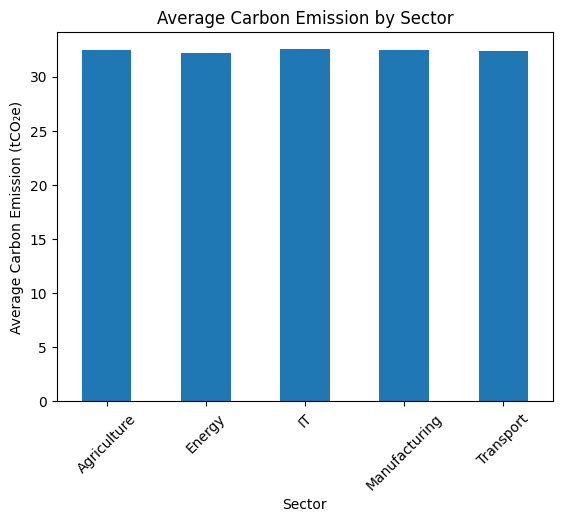

In [9]:
sector_avg = df.groupby('Sector')['Carbon_Emission_tCO2e_TARGET'].mean()

plt.figure()
sector_avg.plot(kind='bar')
plt.xlabel("Sector")
plt.ylabel("Average Carbon Emission (tCO₂e)")
plt.title("Average Carbon Emission by Sector")
plt.xticks(rotation=45)
plt.show()



In [10]:
sector_encoder = LabelEncoder()
transport_encoder = LabelEncoder()
df['Sector'] = sector_encoder.fit_transform(df['Sector'])
df['Supply_Chain_Transport_Mode'] = transport_encoder.fit_transform(
    df['Supply_Chain_Transport_Mode']
)


In [11]:
X = df.drop('Carbon_Emission_tCO2e_TARGET', axis=1)
y = df['Carbon_Emission_tCO2e_TARGET']


In [58]:
y.describe()

count    18250.000000
mean        32.365099
std         14.482041
min          6.814900
25%         20.969350
50%         30.154550
75%         41.520400
max         86.571800
Name: Carbon_Emission_tCO2e_TARGET, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [61]:
df.dtypes

Sector                                   int64
Total_Energy_Consumption_kWh           float64
Renewable_Energy_Consumption_kWh       float64
NonRenewable_Energy_Consumption_kWh    float64
Production_Output_Units                float64
Supply_Chain_Transport_km              float64
Supply_Chain_Transport_Mode              int64
Raw_Material_Usage_kg                  float64
Carbon_Emission_tCO2e_TARGET           float64
Energy_Cost_USD                        float64
Carbon_Tax_USD                         float64
Process_Efficiency_Percent             float64
dtype: object

In [14]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
  

R2 Score: 0.9090087456846023
MAE: 3.3157075476712334


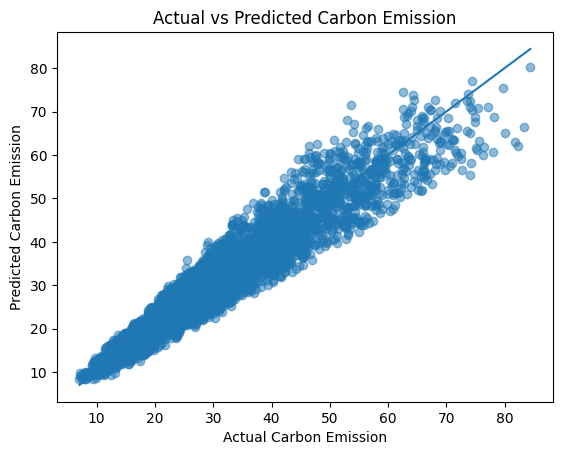

In [39]:
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Actual vs Predicted Carbon Emission")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()


In [15]:
X.head()

,Sector,Total_Energy_Consumption_kWh,Renewable_Energy_Consumption_kWh,NonRenewable_Energy_Consumption_kWh,Production_Output_Units,Supply_Chain_Transport_km,Supply_Chain_Transport_Mode,Raw_Material_Usage_kg,Energy_Cost_USD,Carbon_Tax_USD,Process_Efficiency_Percent
0,3,53751.61,12766.80,40984.81,3008.90,3814.12,3,51334.48,3040.12,338.76,81.07
1,3,170872.89,76733.84,94139.05,4062.25,1199.66,0,17154.72,12837.43,1073.13,69.26
2,3,142777.96,75794.17,66983.79,6196.17,3670.57,3,56288.43,16985.65,1390.41,90.33
3,3,152532.15,20698.80,131833.35,6714.80,2903.63,2,21438.17,18192.00,1942.56,79.49
4,3,81647.43,46657.82,34989.61,8887.31,1916.05,1,37694.23,6704.86,472.20,68.63


In [16]:
y.head()

0    12.5560
1    35.3949
2    30.4517
3    49.5550
4    16.8968
Name: Carbon_Emission_tCO2e_TARGET, dtype: float64

In [17]:
sample = X.iloc[[3]]
print(y.iloc[3])  # Actual value for comparison
prediction = model.predict(sample)
print("Predicted Carbon Emission:", prediction[0])


49.555
Predicted Carbon Emission: 51.96468300000001


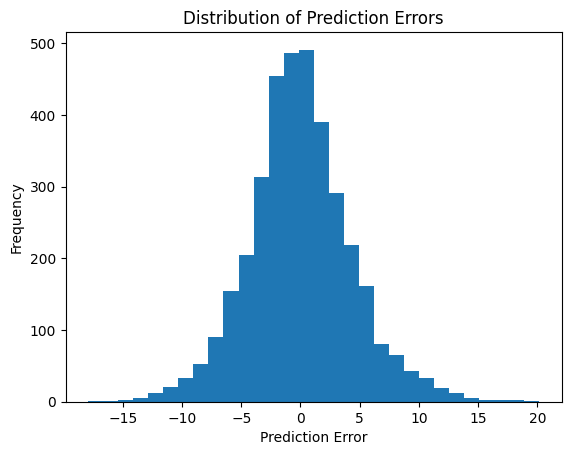

In [41]:
errors = y_test - y_pred

plt.figure()
plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()


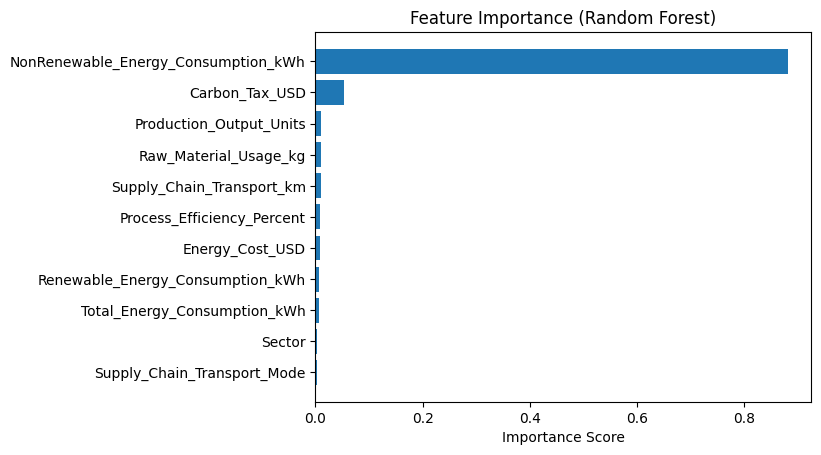

In [64]:
import pandas as pd

importance = model.feature_importances_
features = X.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure()
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.xlabel("Importance Score")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [46]:
df.corr()

,Sector,Total_Energy_Consumption_kWh,Renewable_Energy_Consumption_kWh,NonRenewable_Energy_Consumption_kWh,Production_Output_Units,Supply_Chain_Transport_km,Supply_Chain_Transport_Mode,Raw_Material_Usage_kg,Carbon_Emission_tCO2e_TARGET,Energy_Cost_USD,Carbon_Tax_USD,Process_Efficiency_Percent,Employment_Count,Expected_Carbon_Reduction_Percent,Expected_Renewable_Share_Percent
Sector,1.000000,0.005421,0.007525,0.001499,-0.008393,-0.004636,-0.003471,0.003750,0.001426,0.006079,0.004304,0.001200,0.010510,0.001486,0.002858
Total_Energy_Consumption_kWh,0.005421,1.000000,0.618418,0.827032,0.003260,0.007439,-0.003352,0.004628,0.777758,0.807114,0.665559,-0.002332,0.003412,0.013480,-0.004458
Renewable_Energy_Consumption_kWh,0.007525,0.618418,1.000000,0.069682,-0.003205,0.006402,-0.005829,-0.006563,0.070036,0.498157,0.058744,-0.000944,0.000567,-0.000616,0.708234
NonRenewable_Energy_Consumption_kWh,0.001499,0.827032,0.069682,1.000000,0.006430,0.004864,-0.000085,0.010570,0.937198,0.668208,0.802848,-0.002286,0.003926,0.017552,-0.512292
Production_Output_Units,-0.008393,0.003260,-0.003205,0.006430,1.000000,0.006213,-0.003068,-0.004216,0.006059,0.002962,0.006655,-0.001253,-0.001521,-0.004919,-0.006651
Supply_Chain_Transport_km,-0.004636,0.007439,0.006402,0.004864,0.006213,1.000000,0.002082,-0.001571,0.004581,0.004260,-0.000777,0.001932,-0.005211,-0.008236,-0.005635
Supply_Chain_Transport_Mode,-0.003471,-0.003352,-0.005829,-0.000085,-0.003068,0.002082,1.000000,0.003592,-0.004320,-0.001966,0.001958,0.006803,-0.007798,-0.002353,-0.008582
Raw_Material_Usage_kg,0.003750,0.004628,-0.006563,0.010570,-0.004216,-0.001571,0.003592,1.000000,0.009820,0.005118,0.001612,-0.006329,0.002421,-0.003173,-0.011086
Carbon_Emission_tCO2e_TARGET,0.001426,0.777758,0.070036,0.937198,0.006059,0.004581,-0.004320,0.009820,1.000000,0.626154,0.855654,-0.003971,0.004777,0.010295,-0.476811
Energy_Cost_USD,0.006079,0.807114,0.498157,0.668208,0.002962,0.004260,-0.001966,0.005118,0.626154,1.000000,0.539802,-0.011636,0.002196,0.013241,-0.005156


In [65]:
import pickle

# Assume 'model' is your trained RandomForest or any model

with open("carbon_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("sector_encoder.pkl", "wb") as f:
    pickle.dump(sector_encoder, f)

with open("transport_encoder.pkl", "wb") as f:
    pickle.dump(transport_encoder, f)


In [18]:
print(X.columns.tolist())


['Sector', 'Total_Energy_Consumption_kWh', 'Renewable_Energy_Consumption_kWh', 'NonRenewable_Energy_Consumption_kWh', 'Production_Output_Units', 'Supply_Chain_Transport_km', 'Supply_Chain_Transport_Mode', 'Raw_Material_Usage_kg', 'Energy_Cost_USD', 'Carbon_Tax_USD', 'Process_Efficiency_Percent']
